## Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


## load the Dataset

In [2]:
file_path= "/Users/mayurimamdi/Downloads/netflix_titles.csv"

In [3]:
df=pd.read_csv(file_path)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.shape

(8807, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Analyze the data 

In [10]:
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'],
      shape=(8807,), dtype=object)

In [11]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [12]:
df['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], shape=(8807,), dtype=object)

In [13]:
df['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], shape=(4529,), dtype=object)

In [14]:
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [15]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

## EDA

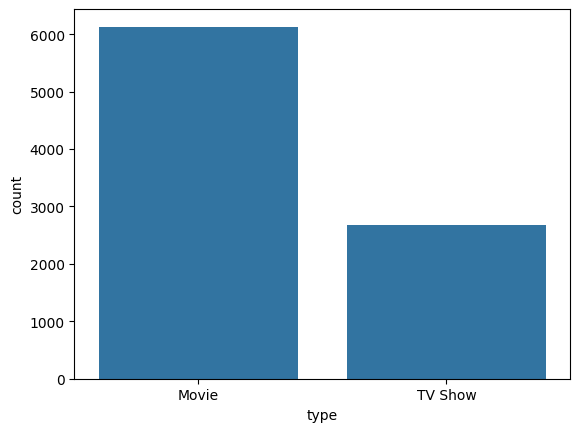

In [21]:
sns.countplot(data=df, x='type')
plt.show()

In [23]:
type_count=df['type'].value_counts().values
type_label=df['type'].value_counts().index

([<matplotlib.patches.Wedge at 0x11f5b3b10>,
 [Text(-0.6357552923508217, 0.8976721050851036, 'Movie'),
  Text(0.6357555848494867, -0.8976718979296876, 'TV Show')],
 [Text(-0.3467756140095391, 0.48963933004642013, '69.6%'),
  Text(0.3467757735542654, -0.4896392170525568, '30.4%')])

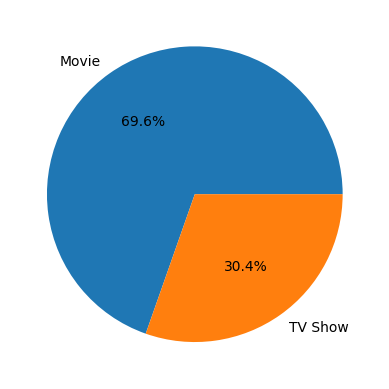

In [30]:
plt.pie(type_count, labels=type_label, autopct="%1.1f%%")

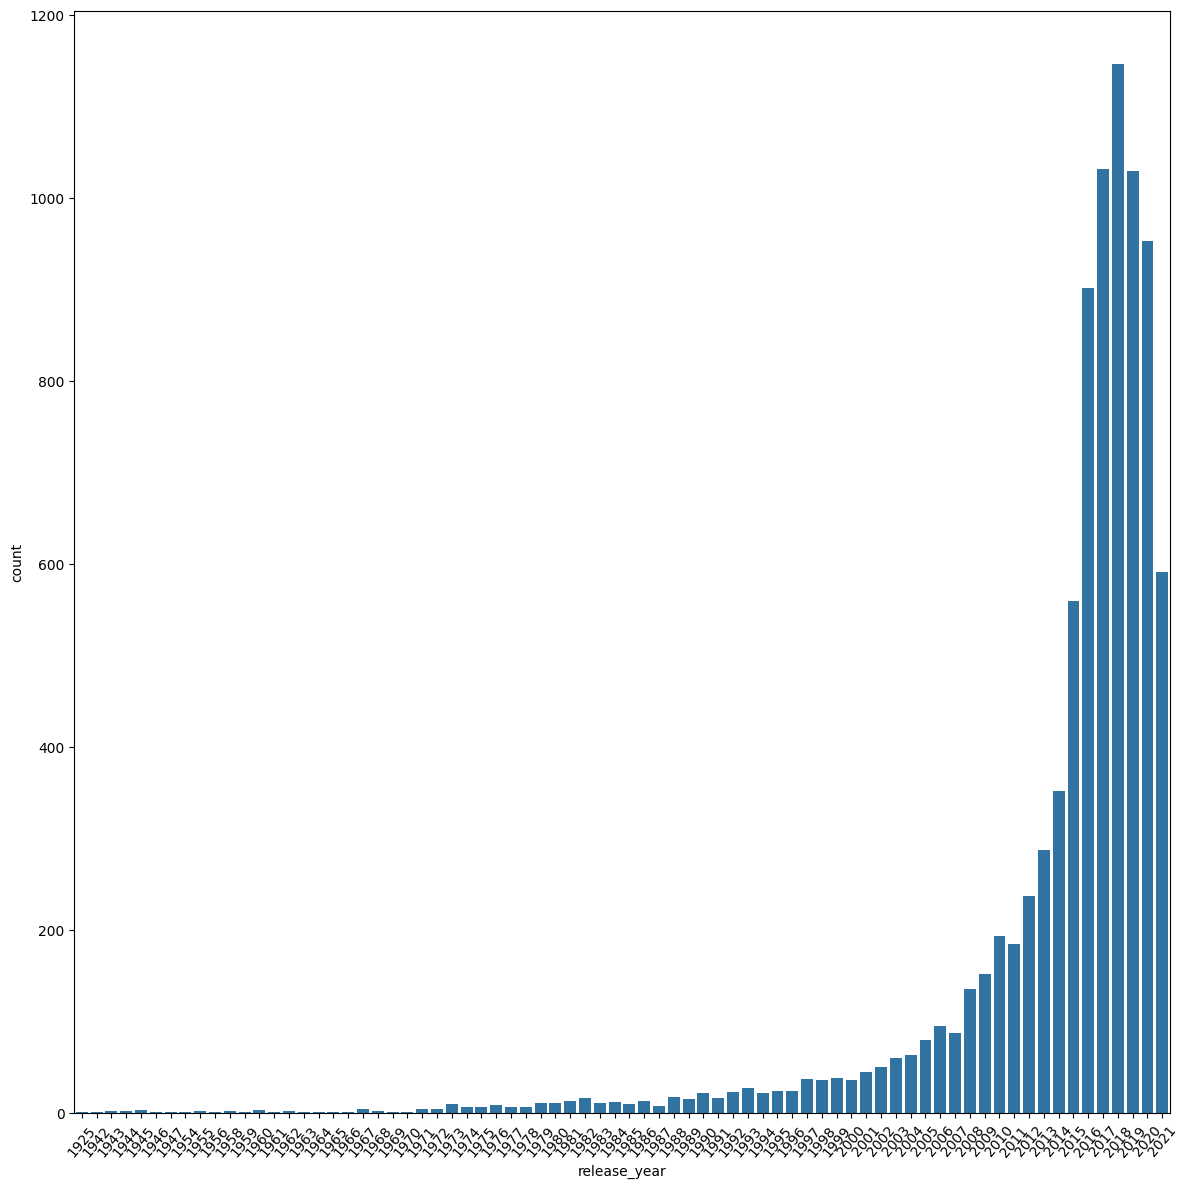

In [41]:
plt.figure(figsize=(12,12))
sns.countplot(x='release_year', data=df)
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [60]:
df_country=df['country'].dropna().head(10).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, 'India'),
  Text(3, 0, 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'Germany, Czech Republic'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Turkey')])

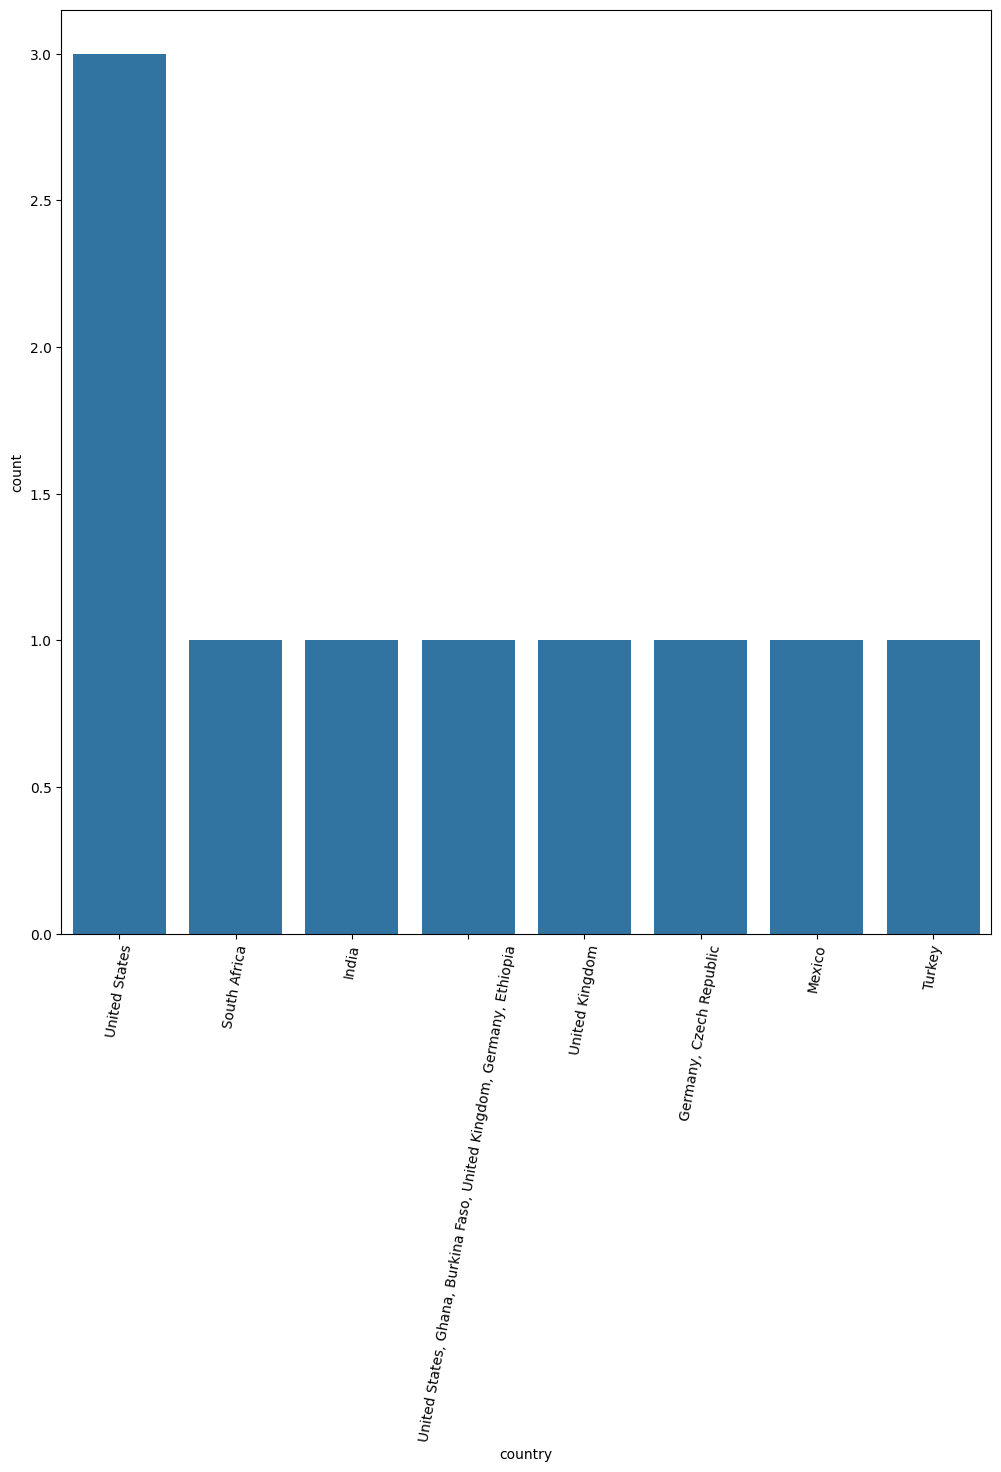

In [61]:
plt.figure(figsize=(12,12))
sns.countplot(x='country',data=df_country)
plt.xticks(rotation=80)

Somethings is off here it seems 

<Axes: xlabel='country', ylabel='count'>

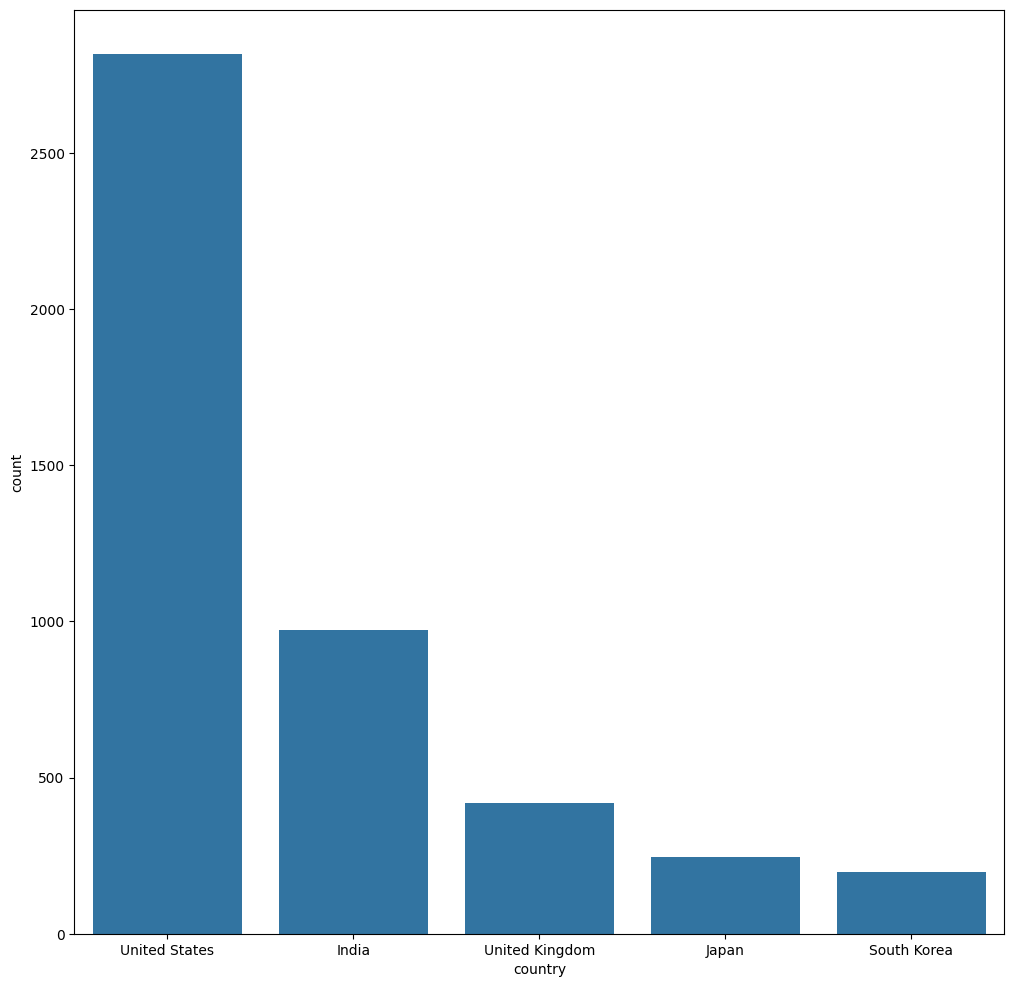

In [64]:
plt.figure(figsize=(12,12))
sns.countplot(x='country', data=df, order=df['country'].value_counts().head(5).index)